<a href="https://colab.research.google.com/github/jwoonge/ML-algorithms/blob/master/06_Binary_Classification_with_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20141261 송제웅  
# 06 Logistic Regression for Binary Classification with Regularization


## - function definition
[1] txt file read

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab import drive

drive.mount('/content/gdrive')
global x_s
global y_s
global l_s
global dims
global learning_rate

def read_data(filename):
    data = np.genfromtxt(filename, delimiter=',')
    pointX = data[:,0]
    pointY = data[:,1]
    label = data[:,2]

    return pointX, pointY, label

[2] Sigmoid Function $\sigma(z) = \frac{1}{1+exp(-z)}$

In [0]:
def sigmoid(z):
    return 1/(1+np.exp(np.float64(-z)))

다항식 함수  
$g(x,y,\theta)=\sum_{i=0}^{9}\sum_{j=0}^{9}{\theta_{i,j}x^i y^i}$

In [0]:
def func(theta, x, y):
    return np.sum(theta * (x**dims[:,0] * y**dims[:,1]))

def func_(theta, x, y):
    ret = theta[0]
    for i in range(1, len(theta)):
        ret += theta[i] * x**dims[i][0] * y**dims[i][1]
    return ret

[4]  Object Function  
$J(\theta)=\frac{1}{m} \sum_{i=1}^m[{-l_i log(\sigma(g(x_i,y_i;\theta))-(1-l_i)log(1-\sigma(g(x_i,y_i;\theta)))}] + \frac{\lambda}{2}\sum_{i=0}^{9}\sum_{j=0}^{9}{\theta_{i,j}^2}$

In [0]:
def object_func(thetas, lam):
    m = len(l_s)
    data_fidelity = 0
    for i in range(m):
        data_fidelity += -l_s[i] * np.log(sigmoid(func(thetas,x_s[i],y_s[i])))
        data_fidelity += -(1-l_s[i])* np.log(1-(sigmoid(func(thetas,x_s[i],y_s[i]))))
    data_fidelity /= m
    regular = np.sum(np.square(thetas)) * lam/2
    return data_fidelity + regular

[5] Gradient Descent  
$\theta_{i,j}(t+1)=\theta_{i,j}(t)-\alpha[\frac{1}{m}\sum_{i=1}^m{(\sigma(g(x_i,y_i;\theta)-l_i)}\frac{\delta g(x_i,y_i;\theta(t))}{\delta\theta_{i,j}} + \lambda\theta_{i,j}(t)]$  

In [0]:
def gradient_descent(thetas, lam):
    m = len(l_s)
    data_fidelity = np.zeros(len(thetas))
    regular = np.zeros(len(thetas))

    for j in range(m):
        z = sigmoid(func(thetas, x_s[j], y_s[j]))-l_s[j]
        for i in range(len(thetas)):
            mult = x_s[j]**dims[i][0] * y_s[j]**dims[i][1]
            data_fidelity[i] += z*mult
    data_fidelity = data_fidelity/m
    
    regular = lam*thetas

    return thetas - learning_rate * (data_fidelity + regular)

[6] Accuracy

In [0]:
def accuracy(thetas):
    correct = 0
    for i in range(len(l_s)):
        classified = sigmoid(func(thetas, x_s[i],y_s[i]))
        if abs(classified-l_s[i]) < 0.5:
            correct += 1
    return correct/len(l_s)*100

## - Main

txt file 의 데이터를 읽어온다

In [0]:
x_s, y_s, l_s = read_data('gdrive/My Drive/Colab Notebooks/ML assignments/05/data-nonlinear.txt')
x_0 = x_s[l_s==0]
x_1 = x_s[l_s==1]
y_0 = y_s[l_s==0]
y_1 = y_s[l_s==1]

고차식 $g(x,y;\theta)$의 각 항에 대한 차수 설정

In [0]:
dims = []
for i in range(10):
    for j in range(10):
        dims.append([i,j])
dims = np.array(dims)

반복문을 위한 초기 조건 설정
$\theta_0, \theta_1...\theta_{99}$은 모두 0부터 (func[5])를 실행  
lambda는 overfit : 0, justright :0.2, underfit:1.2

In [0]:
lambda_overfit = 0
lambda_justright = 0.2
lambda_underfit = 1.2
learning_rate = 0.3

t = 0
thetas_overfit = [np.zeros(100)]
thetas_justright = [np.zeros(100)]
thetas_underfit = [np.zeros(100)]
err_overfit = [object_func(thetas_overfit, lambda_overfit)]
err_justright = [object_func(thetas_justright, lambda_justright)]
err_underfit = [object_func(thetas_underfit, lambda_underfit)]
acc_overfit = [accuracy(thetas_overfit)]
acc_justright = [accuracy(thetas_justright)]
acc_underfit = [accuracy(thetas_underfit)]

gradient descent로 optimization을 하는 반복문  
1회의 반복이 한 번의 최적화 단계가 된다. 

In [0]:
while True:
    thetas_overfit.append(gradient_descent(thetas_overfit[-1], lambda_overfit))
    err_overfit.append(object_func(thetas_overfit[-1], lambda_overfit))
    acc_overfit.append(accuracy(thetas_overfit[-1]))

    thetas_justright.append(gradient_descent(thetas_justright[-1], lambda_justright))
    err_justright.append(object_func(thetas_justright[-1], lambda_justright))
    acc_justright.append(accuracy(thetas_justright[-1]))

    thetas_underfit.append(gradient_descent(thetas_underfit[-1], lambda_underfit))
    err_underfit.append(object_func(thetas_underfit[-1], lambda_underfit))
    acc_underfit.append(accuracy(thetas_underfit[-1]))

    t+= 1

    if t > 5000:
        break

## - Result
[1] Plot the training data

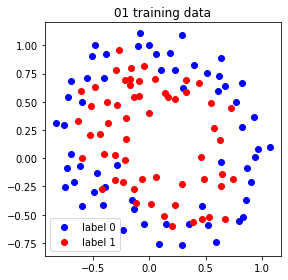

In [32]:
plt.title('01 training data')
plt.scatter(x_0, y_0, c='b', label='label 0')
plt.scatter(x_1, y_1, c='r', label= 'label 1')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

[2] Plot the training error with varying regularization parameters

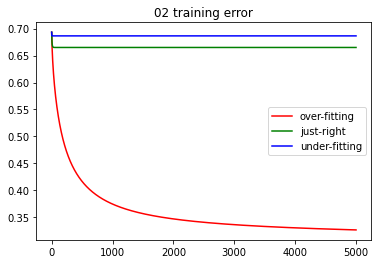

In [24]:
plt.title('02 training error')
plt.plot(err_overfit, c='r', label='over-fitting')
plt.plot(err_justright, c='g', label = 'just-right')
plt.plot(err_underfit, c='b', label = 'under-fitting')
plt.legend()
plt.show()

[3] Display the values of the chosen regularization parameters

In [23]:
print('\033[31m'+"lambda_over-fit   : "+str(lambda_overfit) + '\033[0m')
print('\033[32m'+"lambda_just-right : "+str(lambda_justright) + '\033[0m')
print('\033[34m'+"lambda_under-fit  : "+str(lambda_underfit) + '\033[0m')

lambda_over-fit   : 0
lambda_just-right : 0.2
lambda_under-fit  : 1.2


[4] Plot the training accuracy with varying regularization parameters

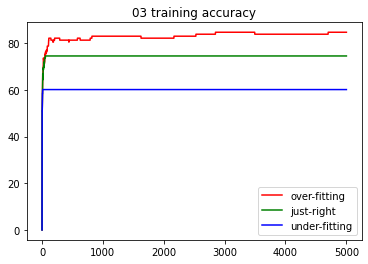

In [25]:
plt.title('03 training accuracy')
plt.plot(acc_overfit, c='r', label='over-fitting')
plt.plot(acc_justright, c='g', label='just-right')
plt.plot(acc_underfit, c='b', label='under-fitting')
plt.legend()
plt.show()

[5] Display the final training accuracy with varying regularization parameters

In [21]:
print('\033[31m'+"accuracy_over-fit   : "+str(acc_overfit[-1]) + '\033[0m')
print('\033[32m'+"accuracy_just-right : "+str(acc_justright[-1]) + '\033[0m')
print('\033[34m'+"accuracy_under-fit  : "+str(acc_underfit[-1]) + '\033[0m')

accuracy_over-fit   : 84.7457627118644
accuracy_just-right : 74.57627118644068
accuracy_under-fit  : 60.16949152542372


[6] Plot the optimal classifier with varying regularization parameters superimposed on the training data

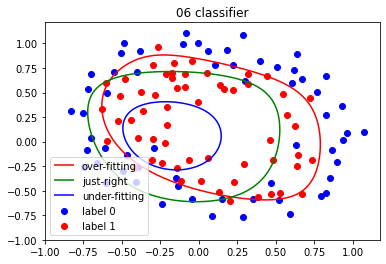

In [34]:
import collections
plt.title('06 classifier')
x_range = np.arange(-1,1,0.005)
y_range = np.arange(-1,1,0.005)
x_range, y_range = np.meshgrid(x_range, y_range)
classified_o = sigmoid(func_(thetas_overfit[-1],x_range,y_range))
classified_j = sigmoid(func_(thetas_justright[-1], x_range, y_range))
classified_u = sigmoid(func_(thetas_underfit[-1], x_range, y_range))
o = plt.contour(x_range,y_range,classified_o,levels=[0,0.5,1], colors='r')
j = plt.contour(x_range,y_range,classified_j,levels=[0,0.5,1], colors='g')
u = plt.contour(x_range,y_range,classified_u,levels=[0,0.5,1], colors='b')
o.collections[1].set_label('over-fitting')
j.collections[1].set_label('just-right')
u.collections[1].set_label('under-fitting')
plt.scatter(x_0, y_0, c='b', label='label 0')
plt.scatter(x_1, y_1, c='r', label='label 1')
plt.legend()
plt.show()